### Notes to Self about using Jyptyer Notebooks:
Escape brings you to command mode when you can use shortcuts quickly
Toggle between markdown (esc + m) code (esc + y)
(esc + h) brings you to a menu of shortcuts

Shortcuts for command mode (continued):
(esc + b) insert cell below
(esc + a) insert cell above

Shortcuts for coding mode:
(shift + tab) = tool tips
(tab) autocomplete 

### Notebook Aims
The aim will be to make a script that allows me to plot distance vs time for the cGAS condensation data. I will do this using bluelake commands, and research on published scripts in harbor 

## Select a file to work with: 

In [36]:
import glob
from lumicks import pylake as lk
import matplotlib.pyplot as plt
import pandas as pd

dir_root = r'C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data_Analysis\Projects\cGAS\2020-10-16 500nM and 4uM cat domain'+'/'
files = glob.glob(dir_root + '*Marker*.h5')
for file in files:
    print(file[len(dir_root):])
file_to_open = dir_root + input("Which file would you like:~copy and paste the file name~")

# Select a an FD curve to plot: 


20201016-165457 Marker 4 DNA 7.h5
20201016-175424 Marker 3 DNA 1 500pM protein.h5
20201016-180129 Marker 7 DNA 3 500nM cat domain.h5
20201016-181031 Marker 10 DNA 5 force clamp 1 settings 4uM protein WEIRD STUFF.h5
20201016-181331 Marker 2 DNA 6.h5
20201016-182135 Marker 12 DNA 8.h5
20201016-182705 Marker 13 DNA 9.h5
Which file would you like:~copy and paste the file name~20201016-182135 Marker 12 DNA 8.h5


###  Optional: run this next cell to visualize all the fd curves in the marker file

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


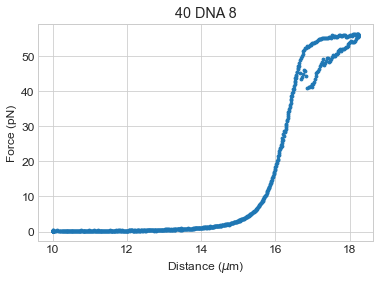

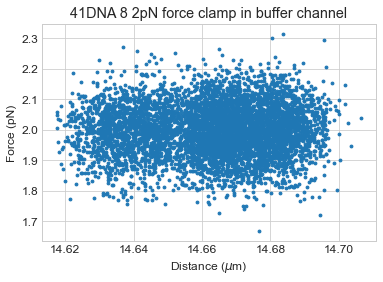

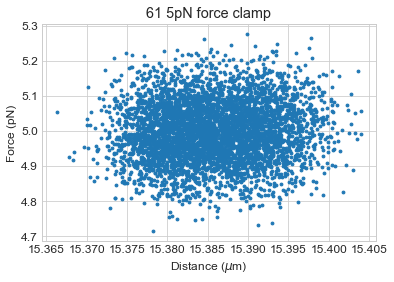

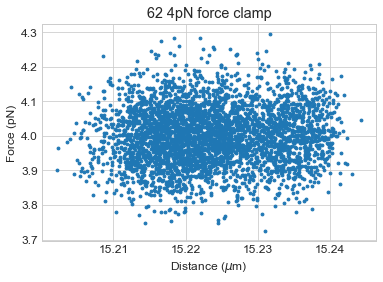

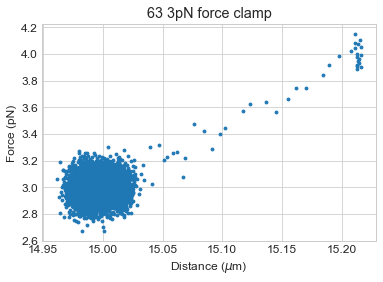

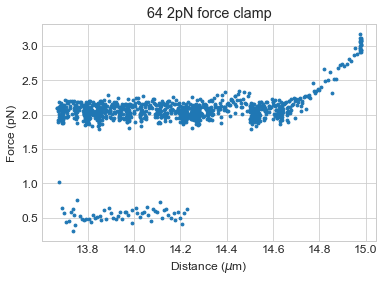

In [37]:
#  Optional: run this to visualize all the fd curves in the marker file
file = lk.File(file_to_open)
fdcurves = file.fdcurves
for name, fd in file.fdcurves.items():
    fig = plt.figure()
    fd.plot_scatter()
    plt.savefig(name)

### Now that you've vidualized some FD curves within the Marker structure, you can pick which ones you want to plot

In [44]:
"""Plot force and distance data"""
plt.rcParams['font.size'] = 12
print(file_to_open)

def open_this(file):
    """Turn Lumicks file from file name to pandas DataFrame."""
    file = lk.File(file)
    fdcurves = list(file.fdcurves)
    for fdcurve in fdcurves:
        print(fdcurve)
    fdcurve_to_open = input("Which fdcurve to work with:~copy and paste the key name~")
    return(fdcurve_to_open)
    
def make_df(file, fdcurve_to_open, bp_scale=0.3):
    """Turn Lumicks file from file name to pandas DataFrame."""
    file = lk.File(file)
#     fdcurves = list(file.fdcurves)
#     for fdcurve in fdcurves:
#         print(fdcurve)
#     fdcurve_to_open = input("Which fdcurve to work with:~copy and paste the key name~")
    f = file.fdcurves[fdcurve_to_open]
    t0 = f.distance1.timestamps[0]
    time = (f.distance1.timestamps - t0)/1e9
    df = pd.DataFrame()
    df['Time (s)'] = time
    df['Distance (µm)'] = f.distance1.data
    df['Distance (nm)'] = df['Distance (µm)']*1000
    df['Force (pN)'] = f.downsampled_force2.data # Claudia's Change to force 2 data
    df['Distance (bp)'] = df['Distance (nm)']/bp_scale
    return(df)

def plot_df(df, fname, force_low, force_high):
    """Plot DataFrame Force and Distance data in ROI for force.

    Saves figure as PNG"""
    subdf = df.loc[(df['Force (pN)'] > force_low) & (df['Force (pN)'] < force_high)]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(subdf['Time (s)'], subdf['Force (pN)'], color='red', alpha=0.5)
    plt.ylabel('Force (pN)')
    ax2 = ax1.twinx()
    ax2.plot(subdf['Time (s)'], subdf['Distance (µm)'])
    plt.ylabel('Distance (µm)')
    plt.xlabel('Time (s)')
    plt.tight_layout()
    plt.savefig(fname + '.png', dpi=300)
    plt.close(fig)




'''files = []
with open('file_list.txt', 'r') as f:
    for line in f:
        line = dir_root + line.strip()
        files.append(line.strip())'''

# for file in files:
fdcurve_to_open = open_this(file_to_open)
df = make_df(file_to_open, fdcurve_to_open)
fig_name = fdcurve_to_open + file_to_open.split('/')[-1][:-3] + '.png'
plot_df(df, fig_name, 1.5, 3.5)
# plot_df(df, fig_name, 1.5, 3.5)



C:\Users\carca\OneDrive - Johns Hopkins University\Ha_CCarcamo\01 Data_Analysis\Projects\cGAS\2020-10-16 500nM and 4uM cat domain/20201016-182135 Marker 12 DNA 8.h5
40 DNA 8
41DNA 8 2pN force clamp in buffer channel
61 5pN force clamp
62 4pN force clamp
63 3pN force clamp
64 2pN force clamp
Which fdcurve to work with:~copy and paste the key name~64 2pN force clamp


,Time (s),Distance (µm),Distance (nm),Force (pN),Distance (bp)
32,0.639795,14.852386,14852.385924,2.320753,49507.953078
35,0.699776,14.825953,14825.952806,2.483708,49419.842687
37,0.739763,14.807754,14807.754451,2.404581,49359.181502
38,0.759757,14.798518,14798.518454,2.360278,49328.394846
39,0.779750,14.794594,14794.594286,2.374554,49315.314288
...,...,...,...,...,...
1111,22.212890,13.671104,13671.103939,2.058633,45570.346462
1112,22.232883,13.667536,13667.535970,2.097269,45558.453233
1113,22.252877,13.666950,13666.950264,2.096988,45556.500882
1114,22.272870,13.670651,13670.651377,1.919753,45568.837924


In [39]:
df.head()
df.tail()

,Time (s),Distance (µm),Distance (nm),Force (pN),Distance (bp)
1171,23.412506,14.188559,14188.559463,0.591770,47295.198210
1172,23.432499,14.198388,14198.388074,0.497296,47327.960248
1173,23.452493,14.207237,14207.236892,0.418452,47357.456308
1174,23.472486,14.217682,14217.681893,0.568198,47392.272977
1175,23.492480,14.227951,14227.950887,0.632804,47426.502956


### A summary of what I did:
First I make a list of all the time values
Next I made an empty list to hold the values that I will save which will be used to index the larger data frame
Next I make a loop that goes from i = 0 (the first time in the list) to one second after the last time point that is divisible by two In the case that the data needs to be slices by 3 seconds or so, find the last time value that is divisible by 3 and add 1 
I found this solution to the problem on this website: https://www.kite.com/python/answers/how-to-find-the-nearest-value-in-a-list-to-a-given-one-in-python#:~:text=Use%20min()%20to%20find,value%20to%20the%20given%20value. 
It takes the actual time value that is closest to the value in the range provided and adds it to the list of values that will be used to slice the larger dataframe

In [33]:
# First I make a list of all the time values
a_list = df['Time (s)'].values

# Next I made an empty list to hold the values that I will save
# which will be used to index the larger data frame
values_to_select = [];
# This for loop goes from i = 0 (the first time in the list) to 
# one second after the last time point that is divisible by two
# In the case that the data needs to be slices by 3 seconds or so,
# find the last time value that is divisible by 3 and add 1 
for i in range(0, 227, 2):
    given_value = i
    # I found this solution to the problem on this website: https://www.kite.com/python/answers/how-to-find-the-nearest-value-in-a-list-to-a-given-one-in-python#:~:text=Use%20min()%20to%20find,value%20to%20the%20given%20value. 
    absolute_difference_function = lambda list_value : abs(list_value - given_value)
    closest_value = min(a_list, key=absolute_difference_function)
    # It takes the actually time value that is closest to the value in the range provided and adds it to
    # the list of values that will be used to slice the larger dataframe
    values_to_select.append(closest_value)
#     print(closest_value)

# I have this print statement here so you can see what the first 10 values of the list look like
print(values_to_select[0:10])

# the for_plot is a data frame that is just the rows of the larger data frame where the time is equal
# to a value in the list of values_to_select
for_plot = df[df['Time (s)'].isin(values_to_select)]
for_plot.head()
# Then I plot the distance v time and the force v time data on top of each other using the new data frame
# created from slicing the parent data frame 
# So that I can have the plots each have their own scale, I define subplots
# ''fig, ax1 = plt.subplots()
# color = 'tab:red'
# ax1.set_xlabel('Time (s)')
# ax1.set_ylabel('Distance (µm)', color = color)
# ax1.plot(for_plot['Time (s)'], for_plot['Distance (µm)'], color = color)
# # And then I duplicate the x axis scale since that is the same in both cases 
# ax2 = ax1.twinx()
# color = 'tab:blue'
# ax2.set_ylabel("Force (pN)", color = color)
# # The y scale would have auto adjusted, but I just wanted to make it more visually appealing 
# ax2.set_ylim(0, 4)
# ax2.plot(for_plot['Time (s)'], for_plot['Force (pN)'], color = color)''

[0.0, 1.99936, 3.99872, 5.99808, 7.99744, 9.9968, 11.99616, 13.99552, 15.99488, 17.99424]


,Time (s),Distance (µm),Distance (nm),Force (pN),Distance (bp)
0,0.00000,13.377828,13377.828089,2.012356,44592.760296
100,1.99936,13.209693,13209.693240,2.027838,44032.310799
200,3.99872,12.872535,12872.535382,2.134827,42908.451275
300,5.99808,12.722804,12722.804065,1.955231,42409.346885
400,7.99744,12.665372,12665.372134,2.135408,42217.907112


### Data for histogram

Text(0.5, 1.0, 'rate of condensation with time')

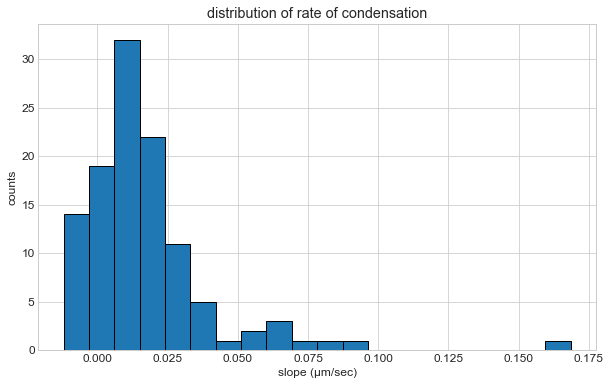

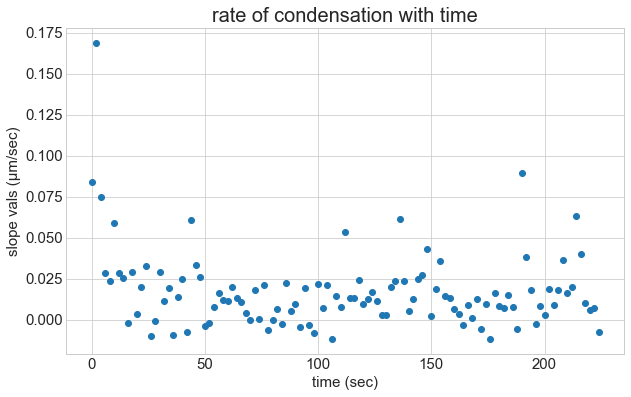

In [35]:
import numpy as np

t, d = for_plot["Time (s)"].values, for_plot["Distance (µm)"].values # gets a numpy array of the 

def slope_calc(x1, y1, x2, y2):
    a = (y2 - y1)/(x2 - x1)
    return a
time = []
slopes = []
for i in range(len(d)-1):
    slopes.append(slope_calc(t[i], d[i], t[i+1], d[i+1]))
    time.append(t[i])
    
slopes = np.array(slopes)


fig = plt.figure(figsize = (10,6))
n = plt.hist(-slopes,bins=20, edgecolor='black')
ax1 = plt.ylabel('counts')
ax1 = plt.xlabel('slope (µm/sec)')
ax1 = plt.title('distribution of rate of condensation')

fig = plt.figure(figsize = (10,6))
plt.scatter(time, -slopes)
plt.ylabel('slope vals (µm/sec)', fontsize = 15)
plt.xlabel('time (sec)',fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('rate of condensation with time',fontsize = 20)


In [ ]:
len(time)

### This is an alternative way of plotting the same thing from above

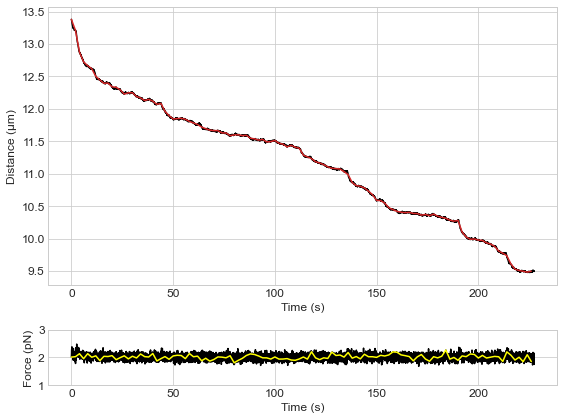

In [34]:
from matplotlib import gridspec
# f, (ax1, ax2) = plt.subplots(2, 1)
fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Distance (µm)')
ax1.plot(df['Time (s)'], df['Distance (µm)'], color = 'black')
ax1.plot(for_plot['Time (s)'], for_plot['Distance (µm)'], color = color)
# And then I duplicate the x axis scale since that is the same in both cases 
# ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel("Force (pN)")
# The y scale would have auto adjusted, but I just wanted to make it more visually appealing 
ax2.set_ylim(1, 3)
ax2.set_xlabel('Time (s)')
ax2.plot(df['Time (s)'], df['Force (pN)'], color = 'black')
ax2.plot(for_plot['Time (s)'], for_plot['Force (pN)'], color = 'yellow')
plt.tight_layout()

In [ ]:
import matplotlib.pyplot as plt # importing matplotlib
import numpy as np # importing numpy
x = np.random.normal(0, 1, 6000) # normal distribution
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(x, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Normal Distribution') 
plt.xlabel('Bins') 
plt.ylabel('Values') 
plt.show()

plt.figure(figsize=(14,7))
n, bins, patches = plt.hist(x, bins=90, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int') # it MUST be integer
# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))
# Make one bin stand out   
# patches[47].set_fc('red') # Set color
# patches[47].set_alpha(1) # Set opacity
# Add annotation
# plt.annotate('Important Bar!', xy=(0.57, 175), xytext=(2, 130), fontsize=15, arrowprops={'width':0.4,'headwidth':7,'color':'#333333'})
# Add title and labels with custom font sizes
plt.title('Normal Distribution', fontsize=12)
plt.xlabel('Bins', fontsize=10)
plt.ylabel('Values', fontsize=10)
plt.show()

## Make a sub data frame when there are weird outlires to get rid of

In [46]:
subdf = df.loc[(df['Force (pN)'] > 1.5) & (df['Force (pN)'] < 2.5)]
subdf.tail()

,Time (s),Distance (µm),Distance (nm),Force (pN),Distance (bp)
1111,22.212890,13.671104,13671.103939,2.058633,45570.346462
1112,22.232883,13.667536,13667.535970,2.097269,45558.453233
1113,22.252877,13.666950,13666.950264,2.096988,45556.500882
1114,22.272870,13.670651,13670.651377,1.919753,45568.837924
1115,22.292864,13.670029,13670.029398,1.890596,45566.764660


[0.6397952, 1.99936, 3.99872, 5.99808, 7.99744, 9.9968, 11.99616, 13.99552, 15.99488, 17.99424]


Text(0.5, 1.0, 'rate of condensation with time')

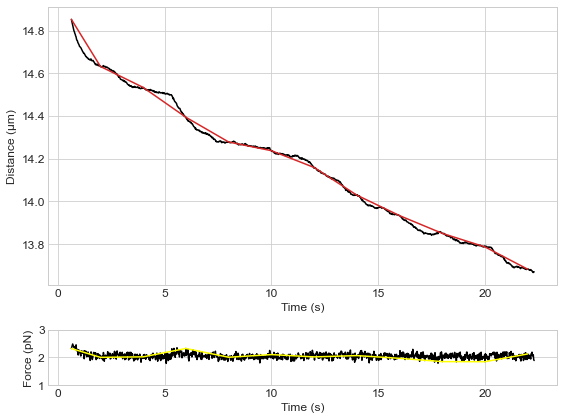

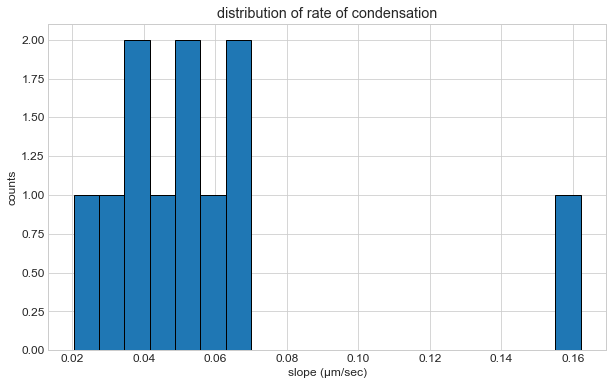

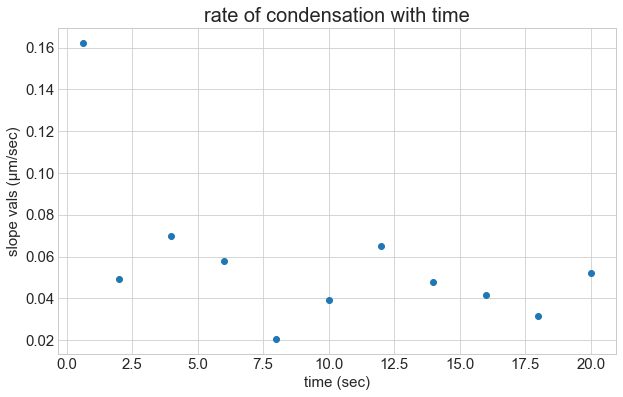

In [50]:
# First I make a list of all the time values
a_list = subdf['Time (s)'].values


values_to_select = [];

for i in range(0, 23, 2):
    given_value = i
    absolute_difference_function = lambda list_value : abs(list_value - given_value)
    closest_value = min(a_list, key=absolute_difference_function)
    values_to_select.append(closest_value)

print(values_to_select[0:10])

for_plot = subdf[subdf['Time (s)'].isin(values_to_select)]

fig = plt.figure(figsize=(8, 6)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
color = 'tab:red'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Distance (µm)')
ax1.plot(subdf['Time (s)'], subdf['Distance (µm)'], color = 'black')
ax1.plot(for_plot['Time (s)'], for_plot['Distance (µm)'], color = color)
# And then I duplicate the x axis scale since that is the same in both cases 
# ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel("Force (pN)")
# The y scale would have auto adjusted, but I just wanted to make it more visually appealing 
ax2.set_ylim(1, 3)
ax2.set_xlabel('Time (s)')
ax2.plot(subdf['Time (s)'], subdf['Force (pN)'], color = 'black')
ax2.plot(for_plot['Time (s)'], for_plot['Force (pN)'], color = 'yellow')
plt.tight_layout()


t, d = for_plot["Time (s)"].values, for_plot["Distance (µm)"].values # gets a numpy array of the 

def slope_calc(x1, y1, x2, y2):
    a = (y2 - y1)/(x2 - x1)
    return a
time = []
slopes = []
for i in range(len(d)-1):
    slopes.append(slope_calc(t[i], d[i], t[i+1], d[i+1]))
    time.append(t[i])
    
slopes = np.array(slopes)


fig = plt.figure(figsize = (10,6))
n = plt.hist(-slopes,bins=20, edgecolor='black')
ax1 = plt.ylabel('counts')
ax1 = plt.xlabel('slope (µm/sec)')
ax1 = plt.title('distribution of rate of condensation')

fig = plt.figure(figsize = (10,6))
plt.scatter(time, -slopes)
plt.ylabel('slope vals (µm/sec)', fontsize = 15)
plt.xlabel('time (sec)',fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('rate of condensation with time',fontsize = 20)